In [ ]:
import numpy as np
from utilities import *
import numpy as np
from numpy import dot

def norm_vec(v):
    return v / np.linalg.norm(v)
np.set_printoptions(precision=3)

from sympy import *
init_printing()

<h1>Seasons Represented as Matrices</h1>

Now we are going to do much of what is in Notebook 9 from a slightly different perspective. Namely, we are going to take all of the document vectors for the corpus, and think of them as the columns in one big matrix.

There are a couple of reasons to do this:

1. The less interesting reason: It can make it possible for us to write more compact code.
2. The more interesting reason: Creating matrices in this manner provides new ways to conceptualize what we're doing. These new conceptualizations provide launching points for more advanced algorithms. (We won't get to these more advanced algorithms today).

Bruce: Go back to the slides here

## Get everything ready, pretty much as before

**Load the corpus**

In [30]:
from seasons_module import load_seasons_corpus
seasons_corpus = load_seasons_corpus()

**Compile the vocabulary in the usual way.**

In [31]:
set_vocab = set([])
for fname in seasons_corpus.keys():
    set_vocab = set_vocab.union(set(seasons_corpus[fname][0]))
f = open("lists/seasons_stop_list.txt")
stop_list = set(f.read().split("\n"))
pruned_vocab = set(sorted([w for w in list(set_vocab) if w not in stop_list]))

**Compute the corpus and document frequency for each term.**

In [32]:
word_fdist = nltk.FreqDist() # the corpus frequences
doc_fdist = nltk.FreqDist()# the document frequencies
for word in pruned_vocab:
    word_fdist[word] = 0
    doc_fdist[word] = 0
    for name in seasons_corpus.keys():
        if word in seasons_corpus[name][0]:
            doc_fdist[word] += 1
            word_fdist[word] += seasons_corpus[name][0].count(word)

### Create a very small vocabulary 

Just 10 words, to make it more simple to understand what's going on.

In [33]:
small_vocab = [w[0] for w in word_fdist.most_common(10)]
print(small_vocab)

['earth', 'side', 'tilted', 'closer', 'axis', 'day', 'time', 'night', 'farther', 'rotates']


**Compute the weighted document vector for each document**

Same as before, but now using our smaller vocabulary.

In [34]:
def tf(tf, df, cf, N):
    return tf

def logtf(tf, df, cf, N):
    if tf == 0:
        result = 0
    else:
        result = (1 + np.log(tf))
    return result

def onehot(tf, df, cf, N):
    if tf == 0:
        return 0
    else:
        return 1

def tfidf(tf, df, cf, N):
    if tf == 0:
        result = 0
    else:
        result = (1 + np.log(tf)) * np.log(N  / df)
    return result

def compute_vector(words, vocab, df, N, weight_function):
    new_vector = []
    for w in vocab:
        tf = words.count(w)
        new_vector.append(weight_function(tf, df[w], 0, N))
    return norm_vec(np.array(new_vector))

In [35]:
# compute the document vector for each document
doc_vectors = {}
N = len(seasons_corpus.keys())
wf = tf
for fname in seasons_corpus.keys():
    doc_vectors[fname] = compute_vector(seasons_corpus[fname][0], small_vocab, doc_fdist, N, wf)

In [36]:
print(len(doc_vectors), len(doc_vectors['angelapre']))

54 10


In [37]:
print(doc_vectors["angelapre"])

[0.875 0.25  0.    0.25  0.    0.125 0.25  0.125 0.125 0.   ]


## Create a termxdocument matrix

This is a matrix where every row corresponds to a word in the vocabulary, and every column corresponds to a document.

Another way to say this: Each column in the matrix is the document vector for a document.

In [38]:
td_matrix = np.zeros([len(small_vocab), len(doc_vectors)])
i = 0
name_index = {}
name_list = []
for name in doc_vectors.keys():
    td_matrix[:, i] = doc_vectors[name]
    name_index[name] = i
    name_list += [name]
    i = i + 1

In [39]:
td_matrix.shape

In [40]:
def round_matrix(the_matrix, prec = 2):
    sh = the_matrix.shape
    if len(sh) == 1:
        for i in range(sh[0]):
            the_matrix[i] = round(the_matrix[i], prec)
    else:
        for i in range(sh[0]):
            for j in range(sh[1]):
                the_matrix[i, j] = round(the_matrix[i, j], prec)
    return the_matrix

In [41]:
Matrix(round_matrix(td_matrix))

⎡0.55  0.69  0.81  0.56  0.5   0.94  0.81  0.41  1.0  0.83  0.88  0.49  0.45  
⎢                                                                             
⎢0.0   0.0   0.16  0.71  0.17  0.24  0.0   0.0   0.0  0.0   0.25  0.16  0.45  
⎢                                                                             
⎢0.0   0.0   0.0   0.0   0.83  0.0   0.0   0.91  0.0  0.28  0.0   0.0   0.0   
⎢                                                                             
⎢0.83  0.46  0.0   0.0   0.0   0.24  0.0   0.0   0.0  0.0   0.25  0.66  0.45  
⎢                                                                             
⎢0.0   0.23  0.0   0.21  0.0   0.0   0.0   0.0   0.0  0.28  0.0   0.25  0.45  
⎢                                                                             
⎢0.0   0.0   0.16  0.07  0.17  0.0   0.46  0.0   0.0  0.28  0.12  0.33  0.0   
⎢                                                                             
⎢0.0   0.46  0.32  0.35  0.0   0.0   0.12  0.0   0.0

#### Document x document similarity

We can get the similarity of two documents by multiplying the termxdocument matrix by it's transpose.

In [46]:
dd_matrix = np.dot(td_matrix.transpose(), td_matrix)

In [47]:
dd_matrix.shape

In [48]:
Matrix(round_matrix(dd_matrix))

⎡0.99  0.76  0.45  0.31  0.28  0.72  0.45  0.23  0.55  0.46  0.69  0.82  0.62 
⎢                                                                             
⎢0.76  1.01  0.8   0.6   0.34  0.76  0.67  0.3   0.69  0.77  0.86  0.79  0.72 
⎢                                                                             
⎢0.45  0.8   1.0   0.7   0.46  0.8   0.88  0.36  0.81  0.81  0.92  0.64  0.62 
⎢                                                                             
⎢0.31  0.6   0.7   1.0   0.41  0.7   0.55  0.23  0.56  0.64  0.77  0.51  0.67 
⎢                                                                             
⎢0.28  0.34  0.46  0.41  1.0   0.51  0.48  0.96  0.5   0.7   0.5   0.33  0.3  
⎢                                                                             
⎢0.72  0.76  0.8   0.7   0.51  1.0   0.76  0.39  0.94  0.78  0.95  0.66  0.64 
⎢                                                                             
⎢0.45  0.67  0.88  0.55  0.48  0.76  1.0   0.35  0.8

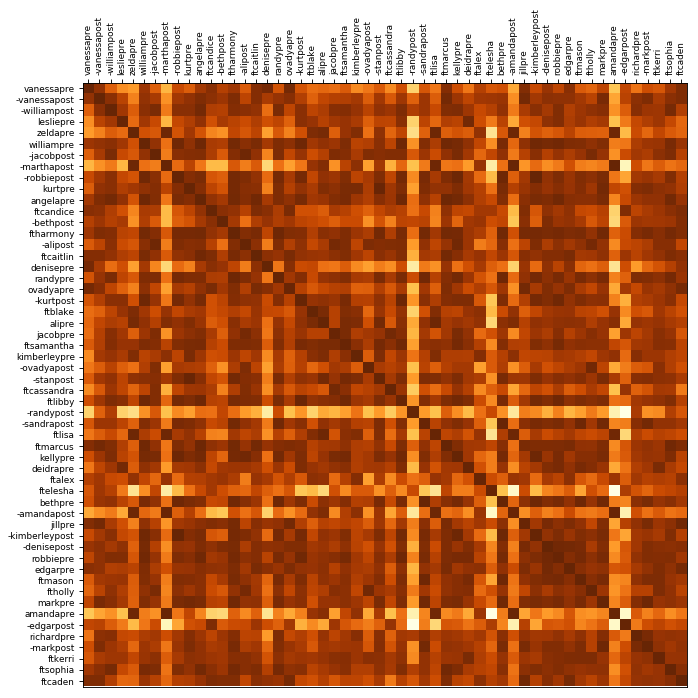

In [49]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
n = len(name_list)
x_tick_marks = np.arange(n)
y_tick_marks = np.arange(n)
plt.xticks(x_tick_marks, name_list, fontsize=8, rotation=90)
plt.yticks(y_tick_marks, name_list, fontsize=8)
plt.tick_params("x", top=True, labeltop=True, bottom=False, labelbottom=False)
plt.imshow(dd_matrix, norm=matplotlib.colors.LogNorm(), interpolation='nearest', cmap='YlOrBr')

**Load the comparison vectors and build a matrix with them.**

In [50]:
from seasons_module import load_seasons_comparison_files
comparison_dict = load_seasons_comparison_files()

In [51]:
# Compute vectors for the comparison documents
comparison_vectors = {}
for fname in comparison_dict.keys():
    comparison_vectors[fname] = compute_vector(comparison_dict[fname], small_vocab, doc_fdist, N, wf)

In [52]:
ctd_matrix = np.zeros([len(small_vocab), len(comparison_vectors)])
i = 0
cdname_index = {}
for name in comparison_vectors.keys():
    ctd_matrix[:, i] = comparison_vectors[name]
    cdname_index[name] = i
    i = i + 1

In [53]:
Matrix(round_matrix(ctd_matrix))

⎡0.84  0.74  0.87⎤
⎢                ⎥
⎢0.48  0.0   0.0 ⎥
⎢                ⎥
⎢0.0   0.64  0.0 ⎥
⎢                ⎥
⎢0.0   0.0   0.35⎥
⎢                ⎥
⎢0.12  0.21  0.0 ⎥
⎢                ⎥
⎢0.0   0.0   0.0 ⎥
⎢                ⎥
⎢0.0   0.0   0.0 ⎥
⎢                ⎥
⎢0.0   0.0   0.0 ⎥
⎢                ⎥
⎢0.0   0.0   0.35⎥
⎢                ⎥
⎣0.24  0.0   0.0 ⎦

In [54]:
Matrix(round_matrix(td_matrix.transpose()))

⎡0.55  0.0   0.0   0.83  0.0   0.0   0.0   0.0   0.0   0.0 ⎤
⎢                                                          ⎥
⎢0.69  0.0   0.0   0.46  0.23  0.0   0.46  0.0   0.23  0.0 ⎥
⎢                                                          ⎥
⎢0.81  0.16  0.0   0.0   0.0   0.16  0.32  0.16  0.4   0.0 ⎥
⎢                                                          ⎥
⎢0.56  0.71  0.0   0.0   0.21  0.07  0.35  0.07  0.0   0.07⎥
⎢                                                          ⎥
⎢0.5   0.17  0.83  0.0   0.0   0.17  0.0   0.0   0.0   0.0 ⎥
⎢                                                          ⎥
⎢0.94  0.24  0.0   0.24  0.0   0.0   0.0   0.0   0.0   0.0 ⎥
⎢                                                          ⎥
⎢0.81  0.0   0.0   0.0   0.0   0.46  0.12  0.12  0.23  0.23⎥
⎢                                                          ⎥
⎢0.41  0.0   0.91  0.0   0.0   0.0   0.0   0.0   0.08  0.0 ⎥
⎢                                                          ⎥
⎢1.0   0.0   0.0   0.0  

We can multiply the comparison matrix by the transpose of the termxdocument matrix in order to get the similarities between the student transcripts and the comparison documents.

In [55]:
code_matrix = np.dot(td_matrix.transpose(), ctd_matrix)

In [56]:
Matrix(round_matrix(code_matrix))

⎡0.46  0.41  0.77⎤
⎢                ⎥
⎢0.61  0.56  0.84⎥
⎢                ⎥
⎢0.76  0.6   0.84⎥
⎢                ⎥
⎢0.85  0.46  0.49⎥
⎢                ⎥
⎢0.5   0.9   0.44⎥
⎢                ⎥
⎢0.9   0.7   0.9 ⎥
⎢                ⎥
⎢0.74  0.6   0.79⎥
⎢                ⎥
⎢0.34  0.89  0.38⎥
⎢                ⎥
⎢0.84  0.74  0.87⎥
⎢                ⎥
⎢0.73  0.85  0.72⎥
⎢                ⎥
⎢0.86  0.65  0.9 ⎥
⎢                ⎥
⎢0.52  0.42  0.74⎥
⎢                ⎥
⎢0.65  0.43  0.71⎥
⎢                ⎥
⎢0.79  0.8   0.92⎥
⎢                ⎥
⎢0.78  0.64  0.75⎥
⎢                ⎥
⎢0.72  0.67  0.84⎥
⎢                ⎥
⎢0.54  0.3   0.64⎥
⎢                ⎥
⎢0.8   0.73  0.88⎥
⎢                ⎥
⎢0.59  0.54  0.82⎥
⎢                ⎥
⎢0.96  0.67  0.79⎥
⎢                ⎥
⎢0.75  0.79  0.53⎥
⎢                ⎥
⎢0.76  0.98  0.67⎥
⎢                ⎥
⎢0.73  0.55  0.63⎥
⎢                ⎥
⎢0.86  0.82  0.74⎥
⎢                ⎥
⎢0.62  0.86  0.58⎥
⎢                ⎥
⎢0.72  0.5   0.58⎥
⎢                ⎥
⎢0.75  0.92 

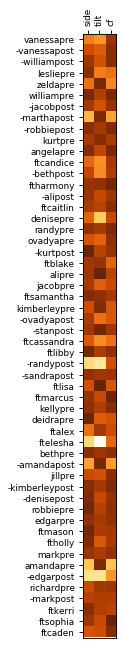

In [57]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
x_tick_marks = np.arange(len(comparison_vectors.keys()))
y_tick_marks = np.arange(len(name_list))
plt.xticks(x_tick_marks, comparison_vectors.keys(), fontsize=8, rotation=90)
plt.yticks(y_tick_marks, name_list, fontsize=8)
plt.tick_params("x", top=True, labeltop=True, bottom=False, labelbottom=False)
plt.imshow(code_matrix, norm=matplotlib.colors.LogNorm(), interpolation='nearest', cmap='YlOrBr')

In [ ]:
inverted_cdname_index = dict(map(lambda item:(item[1],item[0]), cdname_index.items()))
student_codes = {}
for name in seasons_corpus.keys():
    row = list(code_matrix[name_index[name]])
    maxcode = row.index(max(row))
    student_codes[name] = inverted_cdname_index[maxcode]
print(student_codes)

**How similar are our results to the codes assigned by human coders?**

In [ ]:
def compute_accuracy():
    number_right = 0
    total_possible = 0
    for name in student_codes.keys():
        if seasons_corpus[name][1] != "none":
            total_possible += 1
            if student_codes[name] == seasons_corpus[name][1]:
                number_right += 1
    return 1.0 * number_right / total_possible

In [ ]:
compute_accuracy()

In [ ]:
gold_list = []
test_list = []
for name in student_codes.keys():
    if seasons_corpus[name][1] != "none":
        gold_list += [seasons_corpus[name][1]]
        test_list += [student_codes[name]]
cm = nltk.ConfusionMatrix(gold_list, test_list)
print(cm)